<a href="https://colab.research.google.com/github/AgungDaffa/pcvk-week2/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan:  50


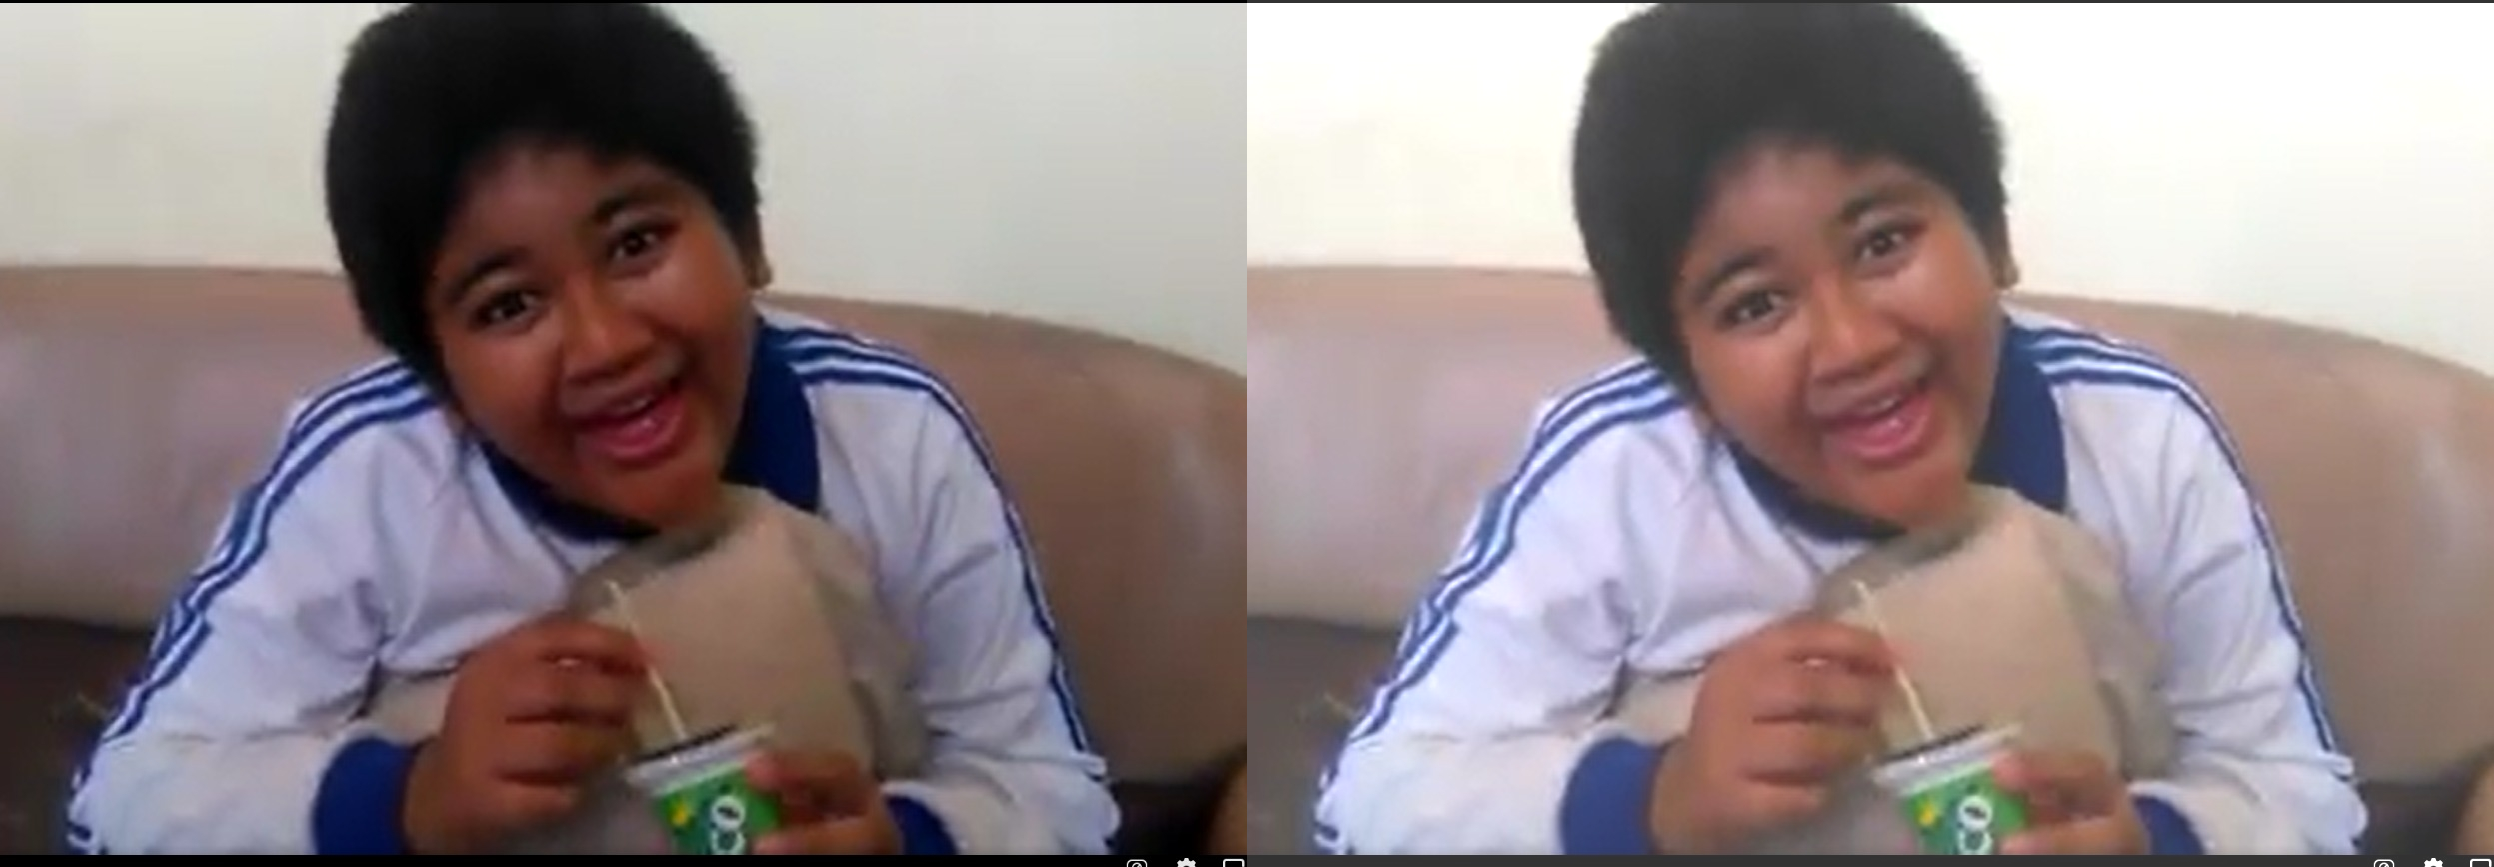

In [7]:
print('mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan:  '))
except ValueError:
  print('error, not number')

original = cv.imread('/content/drive/MyDrive/gambar/Looknam.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### **Tugas**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

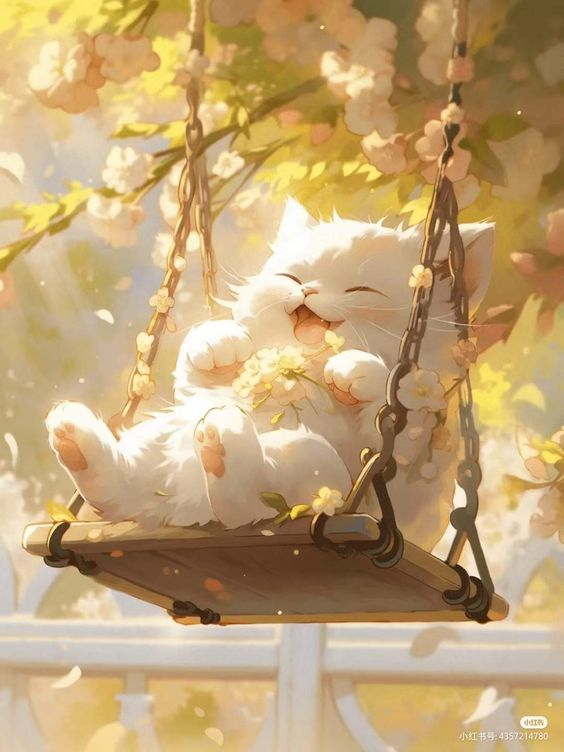

In [53]:
img_rgb = cv.imread('/content/drive/MyDrive/gambar/cat.jpg')
cv2_imshow(img_rgb)

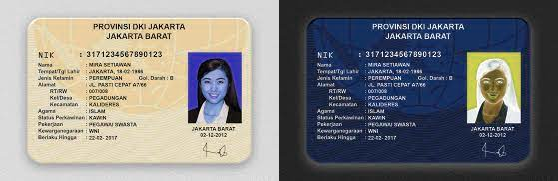

In [16]:
img = cv.imread("/content/drive/MyDrive/gambar/download.jpg")
img_ori = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_inverse = 255 - img_ori

final_frame = cv.hconcat((img_ori, img_inverse))
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan -255 - 255:  50
masukan nilai kontras 1.0 - 3.0:  2


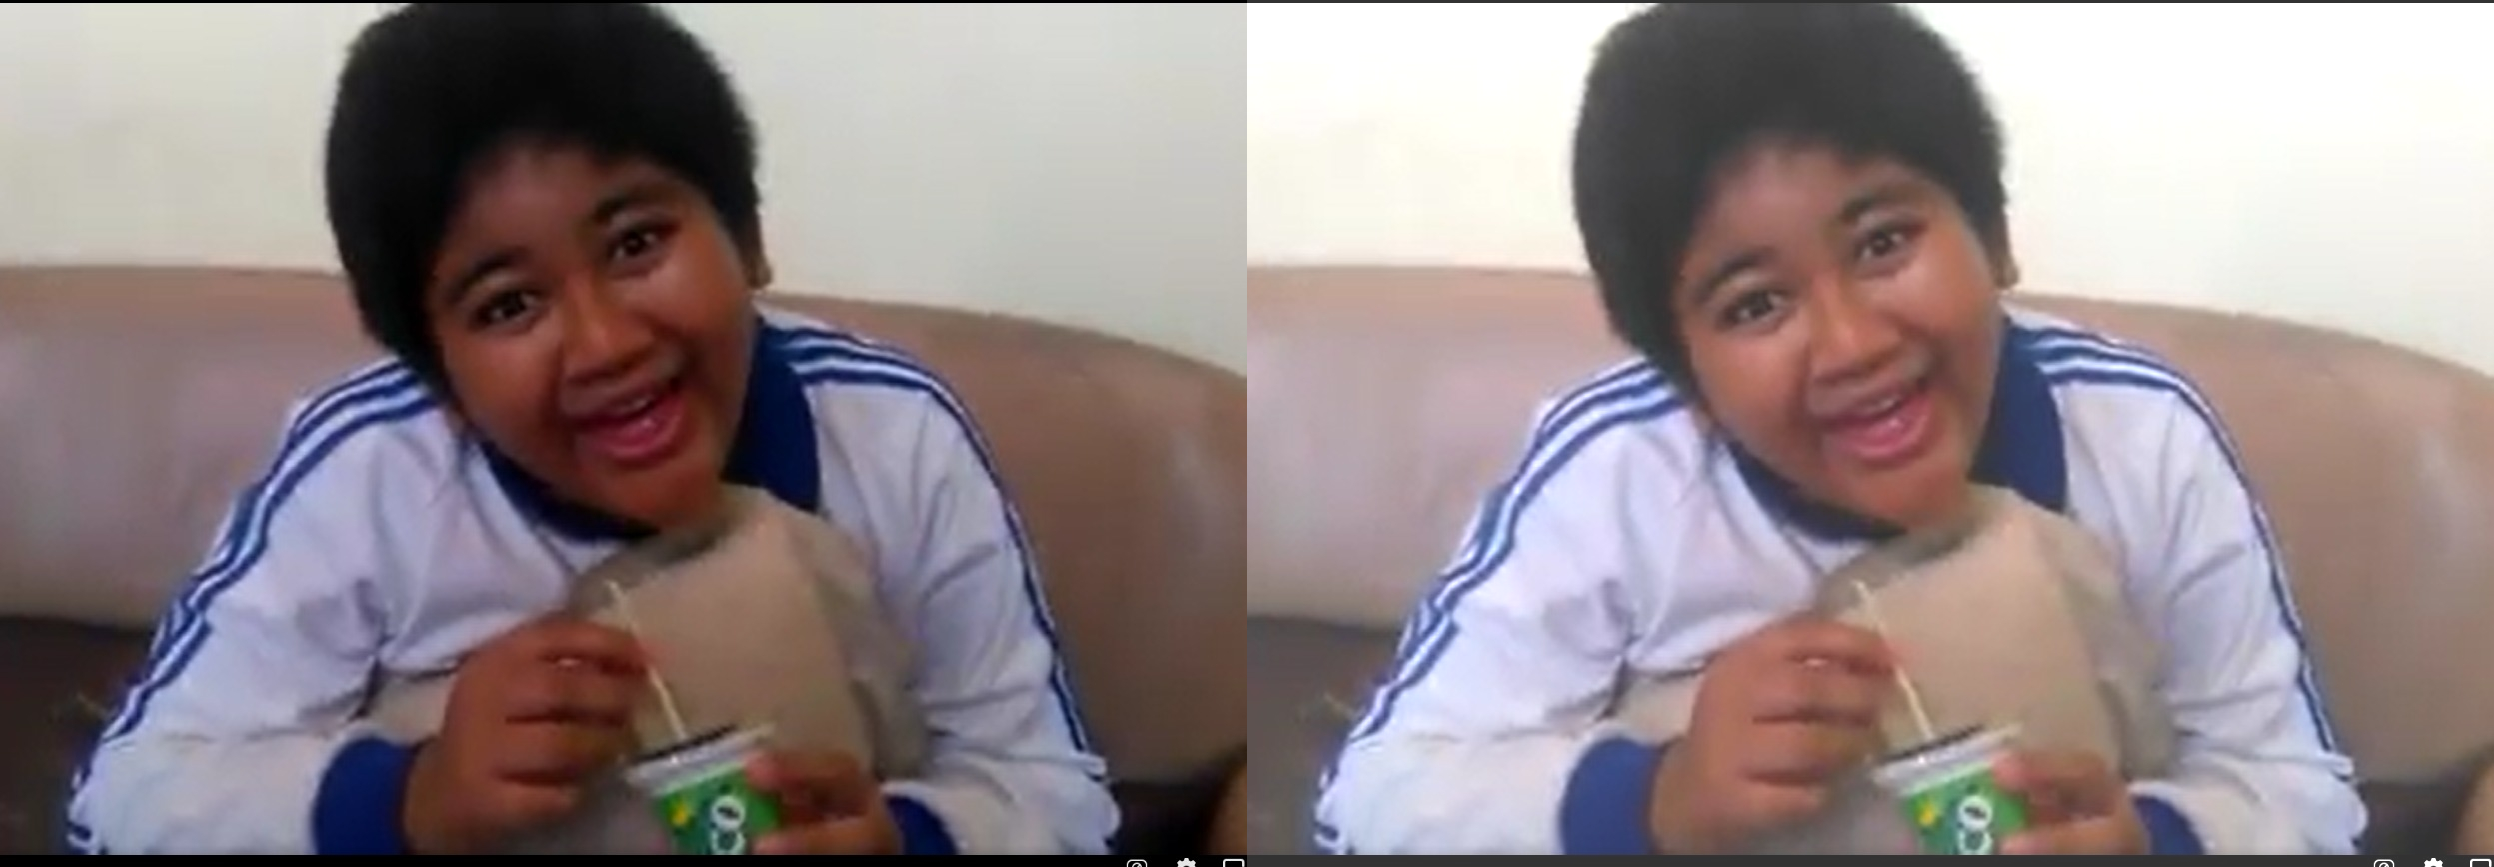

In [17]:
print('mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan -255 - 255:  '))
  contras = float(input('masukan nilai kontras 1.0 - 3.0:  '))
except ValueError:
  print('error, not number')

original = cv.imread('/content/drive/MyDrive/gambar/Looknam.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan:  80


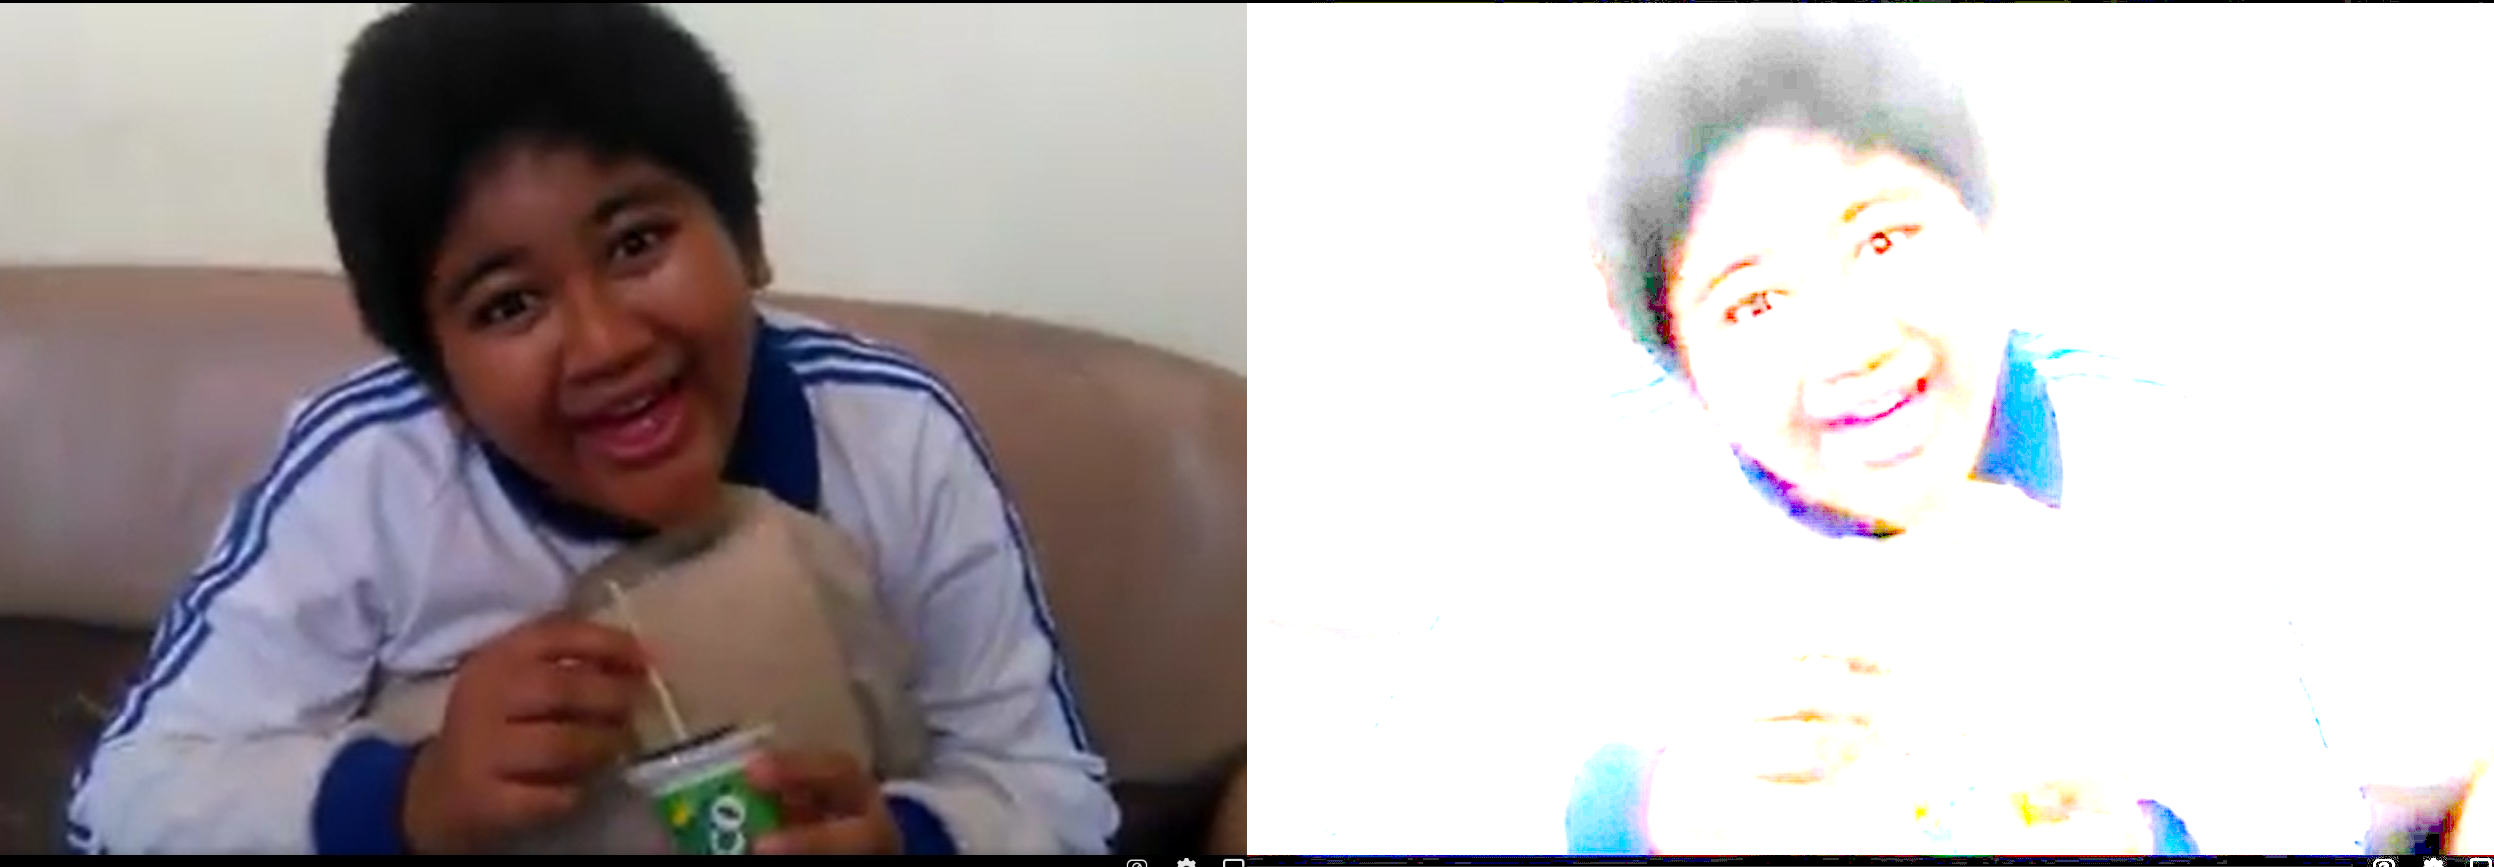

In [19]:
print('mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan:  '))
except ValueError:
  print('error, not number')

original = cv.imread('/content/drive/MyDrive/gambar/Looknam.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. averaging

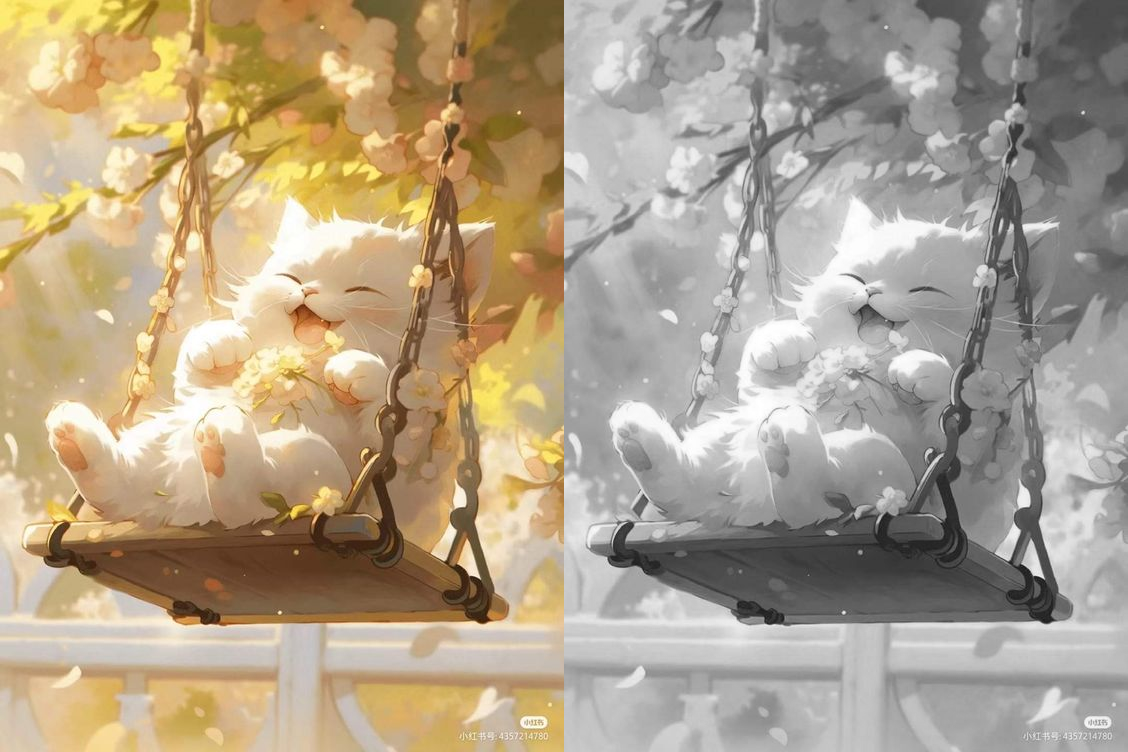

In [54]:
img_avg = cv.imread('/content/drive/MyDrive/gambar/cat.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
final_frame = cv.hconcat((img_rgb, img_avg))
cv2_imshow(final_frame)

b. lightness

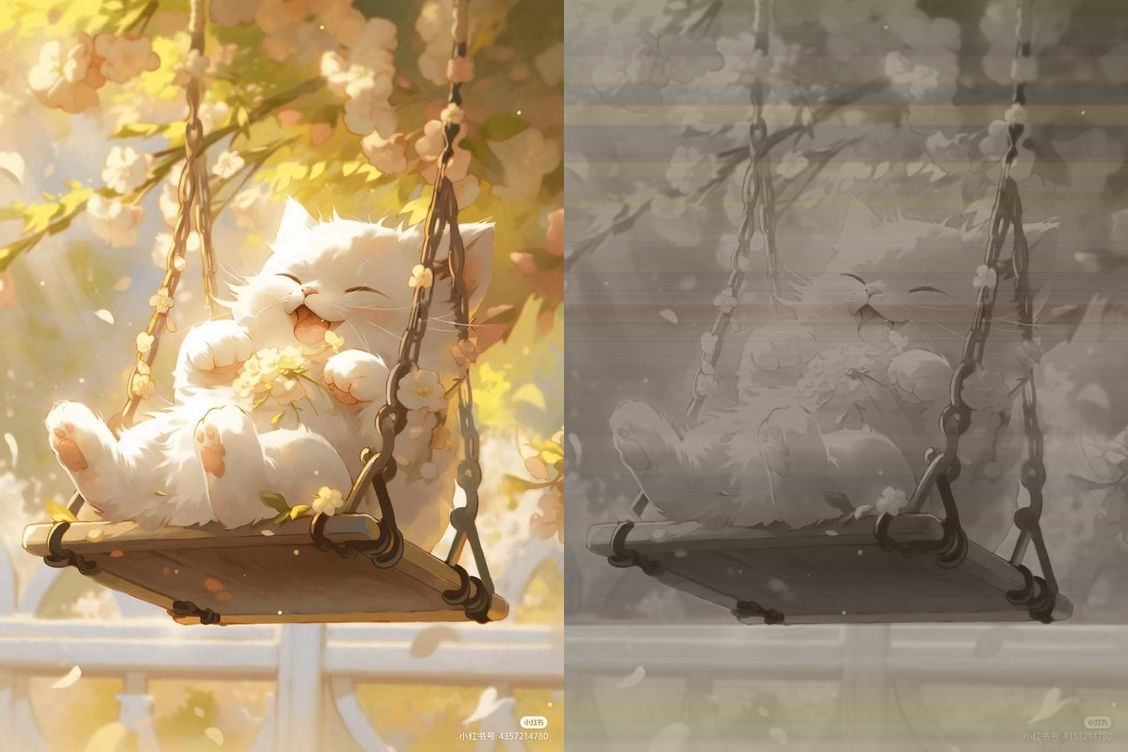

In [56]:
img_light = cv.imread('/content/drive/MyDrive/gambar/cat.jpg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
final_frame = cv.hconcat((img_rgb, img_light))
cv2_imshow(final_frame)

c. luminance

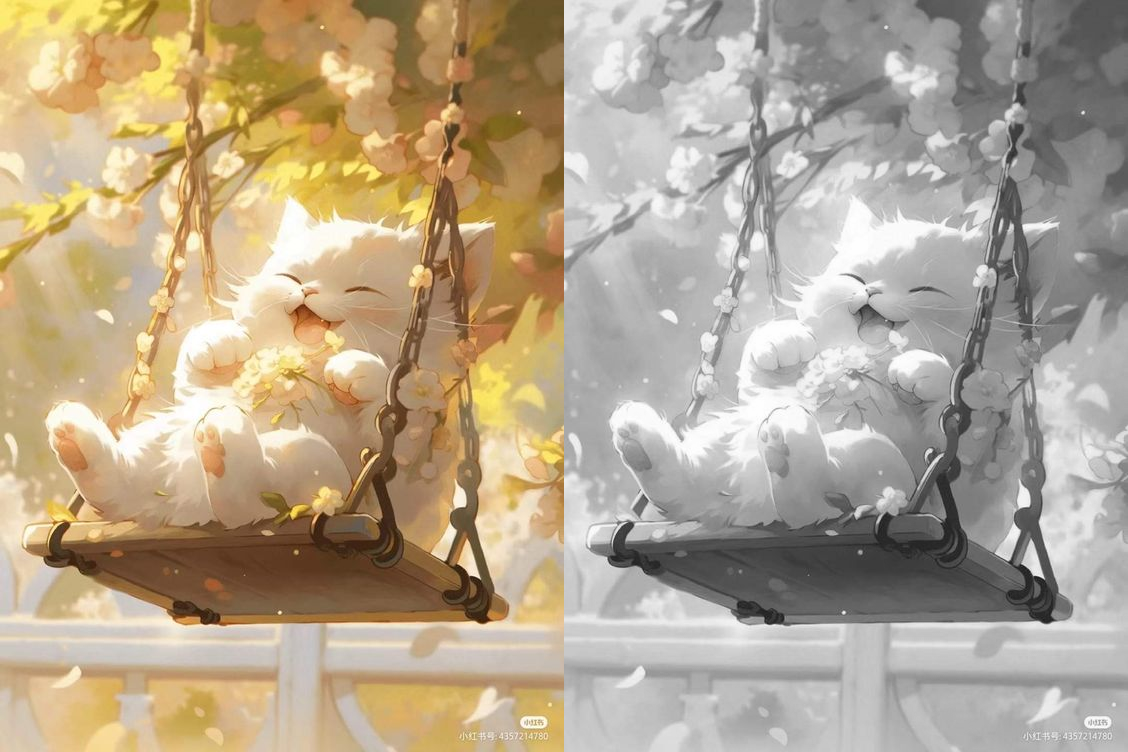

In [58]:
def grayscaleLuminance(image):
    brightness_image = np.zeros(image.shape,image.dtype)

    for ye in range(image.shape[0]):
        for xe in range(image.shape[1]):
            for c in range(image.shape[2]):
                red = image[ye, xe, 2]*0.21  # Saluran merah (indeks 2)
                green = image[ye, xe, 1]*0.72  # Saluran hijau (indeks 1)
                blue = image[ye, xe, 0]*0.07  # Saluran biru (indeks 0)
                maxmin=red+green+blue
                brightness_image[ye, xe, c] = np.clip(maxmin, 0, 255)
    return brightness_image

path='/content/drive/MyDrive/gambar/cat.jpg'
cat = cv.imread(path)
converted= grayscaleLuminance(cat)

final_frame=cv.hconcat ((cat,converted))
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

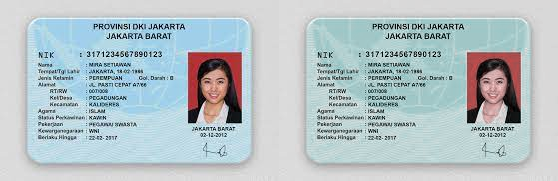

In [65]:
from numpy.ma.extras import average
original = cv.imread('/content/drive/MyDrive/gambar/download.jpg')
inverse_image = np.zeros(original.shape, original.dtype)



for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        r = original[y,x,2]*0.21
        g = original[y,x,1]*0.72
        b = original[y,x,0]*0.07

        maxmin=(r+g+b)

        inverse_image[y,x,2] = original[y,x,2]
        inverse_image[y,x,1] = np.clip(maxmin, 0, 255)
        inverse_image[y,x,0] = np.clip(maxmin, 0, 255)



final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)